<a href="https://colab.research.google.com/github/mkkadambi/machine-learning/blob/main/TensorflowMNIST_NumberRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


# Import MNIST Dataset

In [30]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f'x_train={x_train.shape}, y_train={x_train.shape}')
print(f'x_test={x_test.shape}, y_test={y_test.shape}')

x_train=(60000, 28, 28), y_train=(60000, 28, 28)
x_test=(10000, 28, 28), y_test=(10000,)


In [31]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [32]:
class_names = [str(i) for i in range(10)]
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

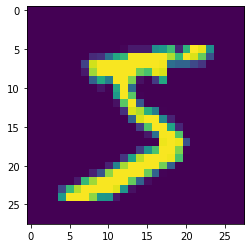

In [33]:
plt.figure()
plt.imshow(x_train[0])
plt.show()

In [34]:
# Normalize tthe images
x_train = x_train/255.
x_test = x_test/255.


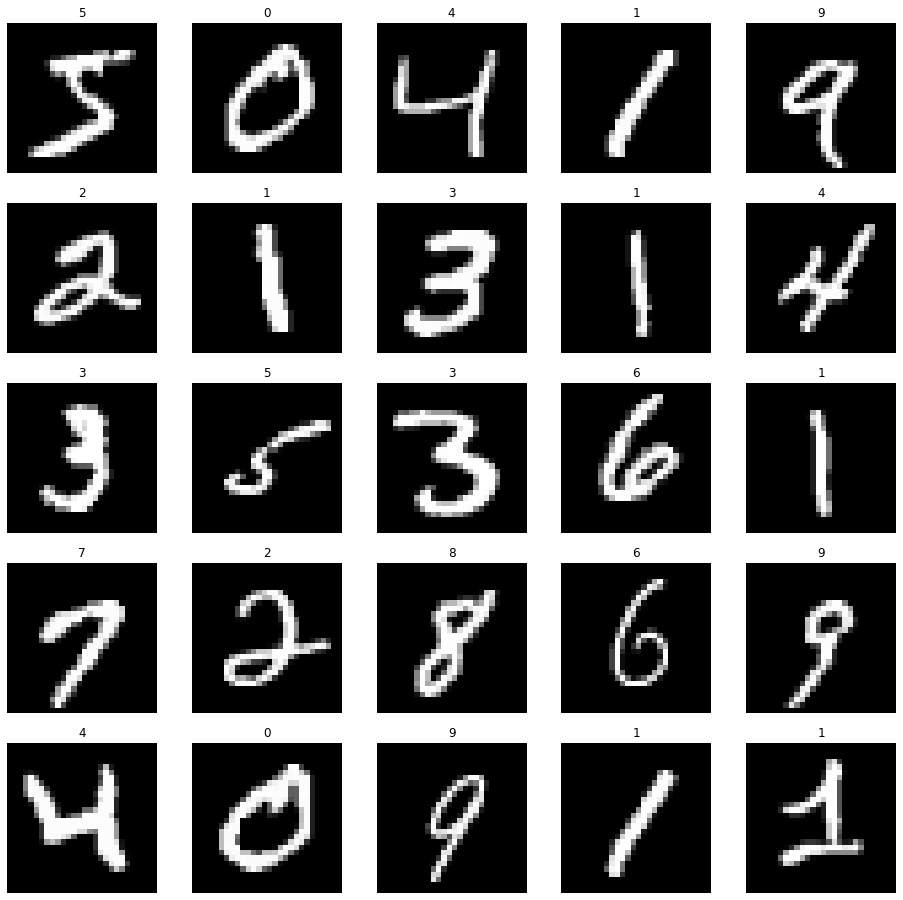

In [35]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(str(y_train[i]))
  plt.axis('off')

# Model Building

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [37]:
model.compile(optimizer='sgd', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )


In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [39]:
model.fit(x_train, y_train, epochs=10, shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6398 - accuracy: 0.8352
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.9155
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2445 - accuracy: 0.9291
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2116 - accuracy: 0.9395
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1867 - accuracy: 0.9462
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1664 - accuracy: 0.9520
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1505 - accuracy: 0.9571
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1372 - accuracy: 0.9605
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1255 - accuracy: 0.9641
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.115

# Model Evaluation

In [40]:

model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1207 - accuracy: 0.9630


[0.12071474641561508, 0.9629999995231628]

In [41]:
# Add a Softmax layer at the end to convert the logits to probabilities
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()                        
])

In [42]:
predictions = prob_model.predict(x_test)


In [43]:
np.argmax(predictions[0]), y_test[0]

(7, 7)

In [45]:
prob_model.compile(optimizer='sgd', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )


In [46]:
prob_model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 1.5191 - accuracy: 0.9630


[1.5191375017166138, 0.9629999995231628]